### imports

In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from graphviz import Source

### loading dataset

In [251]:
data = pd.read_csv("car_evaluation.csv")

### data exploration

In [252]:
data.head(5)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [253]:
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [254]:
for i in data.columns:
  print(i)
  print(data[i].value_counts(), "\n")

buying
vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64 

maint
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64 

doors
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64 

persons
2       576
4       576
more    576
Name: persons, dtype: int64 

lug_boot
small    576
med      576
big      576
Name: lug_boot, dtype: int64 

safety
low     576
med     576
high    576
Name: safety, dtype: int64 

class
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64 



In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [256]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [257]:
data.shape

(1728, 7)

In [258]:
buying_counts = data["buying"].value_counts()

categories = buying_counts.index.tolist()
values = buying_counts.values.tolist()

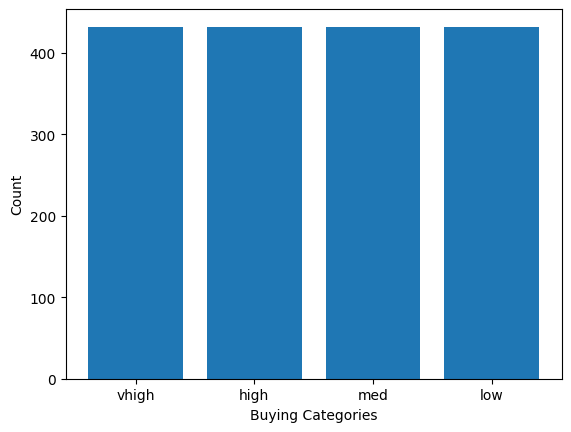

In [259]:
plt.bar(categories, values)
plt.xlabel("Buying Categories")
plt.ylabel("Count")
plt.show()

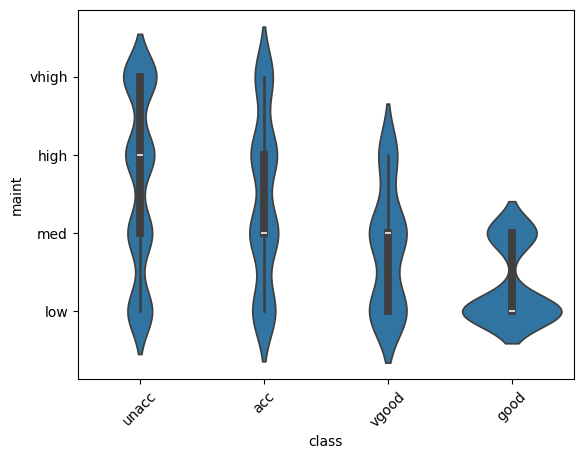

In [260]:
sns.violinplot(x="class", y="maint", data=data)
plt.xticks(rotation=45)
plt.show()

### missing value treatment (if required)

In [261]:
data.duplicated().sum()

0

In [262]:
print(data.isna().sum())
print(f"total missing values => {data.isna().sum().sum()}")

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64
total missing values => 0


- as there are no missing, duplicate values in dataset, missing value treatment is not required

### splitting dataset into test and train (80 20)

In [263]:
x = data.iloc[:, :-1]
y = data["class"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=104, shuffle=True)

### ordinal encoding on ["buying", "maint", "doors", "persons", "lug_boot", "safety"]

In [264]:
encoder = OrdinalEncoder()

x_train[["buying", "maint", "doors", "persons", "lug_boot", "safety"]] = encoder.fit_transform(x_train[["buying", "maint", "doors", "persons", "lug_boot", "safety"]])
x_test[["buying", "maint", "doors", "persons", "lug_boot", "safety"]] = encoder.fit_transform(x_test[["buying", "maint", "doors", "persons", "lug_boot", "safety"]])

### decision tree classification with criteria as "entropy"

In [265]:
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)

decision_tree = classifier.fit(x_train, y_train)

### predict class for test data and find accuracy

In [266]:
y_pred = classifier.predict(x_test)

print(f"accuracy => {accuracy_score(y_test, y_pred)}")

accuracy => 0.7456647398843931


### predict class for train data and find accuracy

In [267]:
y_pred_train = classifier.predict(x_train)

print(f"accuracy => {accuracy_score(y_train, y_pred_train)}")

accuracy => 0.7858176555716353


### compare accuracy and comment on overfitting or underfitting

- accuracy (test) --- 0.7456647398843931
- accuracy (train) --- 0.7858176555716353
- as accuracy of test and train is quite similar we can say that overfitting does not exist in this model
- accuracy of test and train is low i.e. <0.8 so we can say that there is some degree of underfitting in the model

### plot decision tree using matplotlib

[Text(0.375, 0.875, 'x[3] <= 0.5\nentropy = 1.205\nsamples = 1382\nvalue = [317, 51, 962, 52]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 465\nvalue = [0, 0, 465, 0]'),
 Text(0.5, 0.625, 'x[5] <= 0.5\nentropy = 1.475\nsamples = 917\nvalue = [317, 51, 497, 52]'),
 Text(0.25, 0.375, 'x[0] <= 2.5\nentropy = 1.621\nsamples = 305\nvalue = [170, 18, 65, 52]'),
 Text(0.125, 0.125, 'entropy = 1.602\nsamples = 230\nvalue = [132, 18, 28, 52]'),
 Text(0.375, 0.125, 'entropy = 1.0\nsamples = 75\nvalue = [38, 0, 37, 0]'),
 Text(0.75, 0.375, 'x[5] <= 1.5\nentropy = 1.076\nsamples = 612\nvalue = [147, 33, 432, 0]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 304\nvalue = [0, 0, 304, 0]'),
 Text(0.875, 0.125, 'entropy = 1.381\nsamples = 308\nvalue = [147, 33, 128, 0]')]

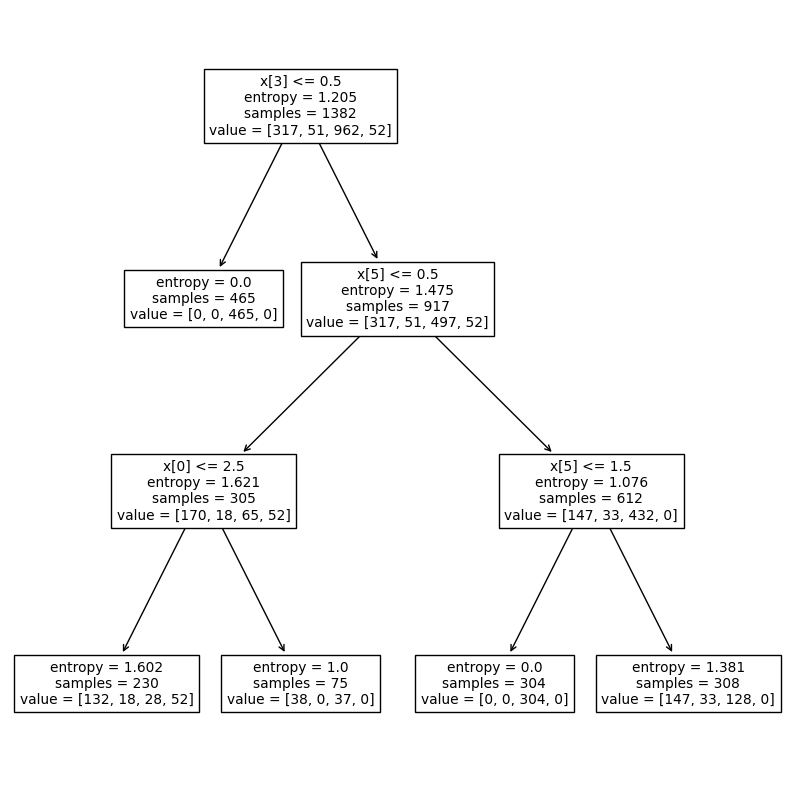

In [268]:
plt.figure(figsize=(10, 10))
plot_tree(decision_tree)

### identify number of pure partitions (comment on the entropy of pure partitions)

- 2 pure partitions are created i.e. one at depth 1 of 445 samples and the other at depth 3 of 309 samples
- entropy of pure partitions is always 0

### plotting decision tree using graphviz (which attribute is root node?)

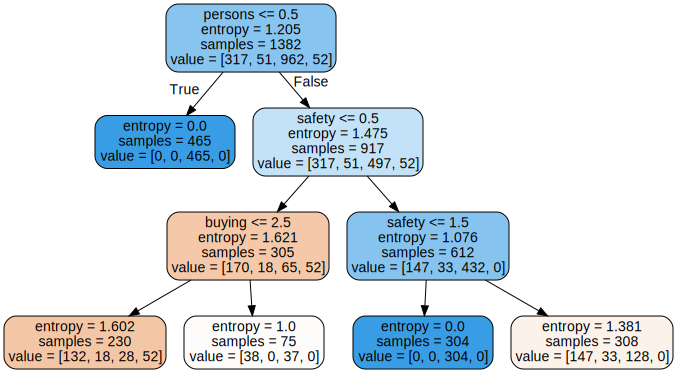

In [269]:
dot_data = export_graphviz(decision_tree, feature_names=x.columns, filled=True, rounded=True)

Source(dot_data)

- **the attribute selected as root node = persons**

### plotting confusion matrix for test dataset

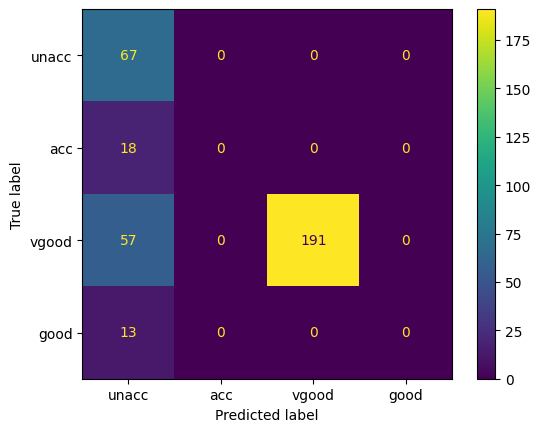

In [270]:
confusion_matrix = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=y.unique()).plot()

### classification report for test dataset (comments)

In [271]:
print("classification report ~", "\n")
print(classification_report(y_test, y_pred))

classification report ~ 

              precision    recall  f1-score   support

         acc       0.43      1.00      0.60        67
        good       0.00      0.00      0.00        18
       unacc       1.00      0.77      0.87       248
       vgood       0.00      0.00      0.00        13

    accuracy                           0.75       346
   macro avg       0.36      0.44      0.37       346
weighted avg       0.80      0.75      0.74       346



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- there is class imbalance for "unacc" in the dataset
- so, classification model is not able to perform well for the other classes